In [1]:
import pandas as pd

In [2]:
# Carregando o arquivo CSV
df = pd.read_csv('dados.csv')

In [3]:
# Criar um dicionário de mapeamento
classe_map = {1: 'A', 2: 'B1', 3: 'B2', 4: 'C1', 5: 'C2', 6: 'DE'}

# Substituir os valores da coluna 'CLASSE'
df['CLASSE'] = df['CLASSE'].map(classe_map)

# Verificar a alteração
print(df['CLASSE'].unique())

['C1' 'C2' 'DE' 'B2' 'B1' 'A']


In [6]:
df_sem_classe = df.drop(columns=['CLASSE'])

In [7]:
from sklearn.preprocessing import StandardScaler

# Padronizando os dados
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_sem_classe)


In [8]:
from sklearn.cluster import KMeans

# Definindo o número de clusters (por exemplo, 3)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)

# Ajustando o modelo aos dados
kmeans.fit(df_sem_classe)

# Obtendo os rótulos de cluster para cada ponto
labels = kmeans.labels_


In [9]:
# Adicionando os rótulos de cluster ao dataframe original
df['Cluster'] = labels

# Visualizando os primeiros dados com os clusters
print(df.head())


   Qtd_Moradores  Maquina_de_Lavar_1  Geladeiras_1  Freezer_1  \
0            3.0                 0.0           1.0        0.0   
1            2.0                 0.0           1.0        1.0   
2            2.0                 0.0           1.0        0.0   
3            2.0                 1.0           1.0        1.0   
4            2.0                 1.0           1.0        1.0   

   Microcomputador  Lava_Loucas_1  Microondas_1  Ar_Condicionado  Televisao  \
0              0.0            0.0           0.0              0.0        1.0   
1              1.0            0.0           0.0              0.0        2.0   
2              0.0            0.0           0.0              0.0        1.0   
3              1.0            0.0           1.0              1.0        2.0   
4              1.0            0.0           1.0              0.0        2.0   

   Batedeira  ...  Aquecedor_de_Ambiente  Ventilador_de_Teto  \
0        1.0  ...                    0.0                 0.0   
1     

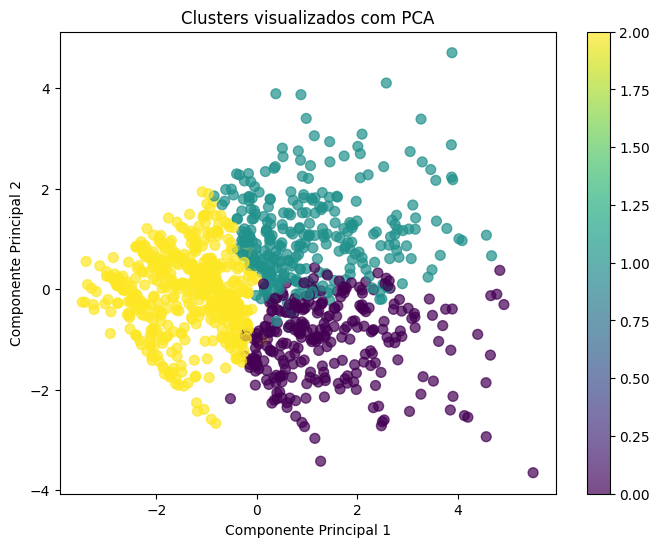

In [10]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduzindo os dados para 2 componentes principais
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_sem_classe)

# Plotando os clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
plt.title('Clusters visualizados com PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar()
plt.show()


Método do Cotovelo

In [ ]:
inertia = []
K_range = range(1, 10)

# Testando diferentes números de clusters
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

# Plotando o gráfico de elbow
plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de clusters')
plt.ylabel('Inertia')
plt.show()


Grafico de Dispersao do Dataframe

In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Carregando o dataframe
df = pd.read_csv('dados.csv')

# Separando os dados das classes
X = df.drop(columns='CLASSE')  # Dados sem a coluna 'classe'
y = df['CLASSE']  # Coluna 'classe' com os 6 valores distintos

# Padronizando os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [12]:
# Aplicando PCA para reduzir os dados para 2 dimensões
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


In [ ]:
# Plotando os clusters com as cores da coluna 'classe'
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=50, alpha=0.7)
plt.title('Clusters visualizados com PCA (coluna classe)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

# Adicionando uma barra de cores para identificar as classes
plt.colorbar(scatter)
plt.show()

Classe por cluster

In [25]:
# Ajuste do K-means para obter os rótulos de cluster
from sklearn.cluster import KMeans

# Definindo o número de clusters (por exemplo, 3)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

# Adicionando os rótulos de cluster ao dataframe
df['Cluster'] = kmeans.labels_


In [ ]:
# Contando as classes em cada cluster
class_count = df.groupby(['Cluster', 'CLASSE']).size().unstack(fill_value=0)

# Exibindo o resultado
print(class_count)
